Chloe Chen
Updated: 2/28/2023


### Import packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helper import *

### Connect to MySQL Database

In [6]:
from connection import *

con = connect()

### TODO: why is the error popping up? doesn't affect function though

2023-04-18 15:10:09,690| ERROR   | Password is required for key /home/chloe/.ssh/id_rsa


Connection Successful


In [ ]:
# test
query = "show databases;"
SQL(query, con)

In [ ]:
# test
query = "test.sql"
SQL(query, con)

### Context

In [ ]:
## basic info, takes about 10 secs to load, filtered preliminary
query = "context_query.sql"
context_df = SQL(query, con)

In [ ]:
context_df.drop_duplicates()
context_df.head()

In [ ]:
## print out basic information
print("Number of patients: ", len(pd.unique(context_df["id"])))
print("Age groups: ", pd.unique(context_df["age_group"]))
print("disorders: ", pd.unique(context_df["disorder_id"])) ## potentially filter out more diseases
print("deficits: ", pd.unique(context_df["deficit_id"])) ## potentially filter out more deficits


In [ ]:
context_df.nunique()

In [ ]:
context_df["disorder_id"].value_counts()

In [ ]:
context_df_disorder = context_df.groupby(["id"])["disorder_id"].apply(set).reset_index()
context_df_disorder.head()

In [ ]:
context_df_disorder = context_df_disorder.explode("disorder_id")
context_df_disorder.head()

In [ ]:
sns.histplot(data=context_df_disorder, x="disorder_id")

In [ ]:
context_df_deficit = context_df.groupby(["id"])["deficit_id"].apply(set).reset_index()
context_df_deficit.head()

In [ ]:
context_df_deficit = context_df_deficit.explode("deficit_id")
context_df_deficit.head()

In [ ]:
sns.histplot(data=context_df_deficit, x="deficit_id")

In [ ]:
context_df["condition_since"] = context_df["condition_since"].apply(time_convert)

In [ ]:
context_df.head()

In [ ]:
context_df_time = context_df.drop_duplicates(subset="id")
context_df_time.head()

In [ ]:
print("Average time since onset: ", context_df_time["condition_since"].mean(), "month")
print("Median time since onset: ", context_df_time["condition_since"].median(), "month")
print("Mode of time since onset: ", context_df_time["condition_since"].mode(), "month")
print("Standard Deviation: ", context_df_time["condition_since"].std(), "month")
print("Variance: ", context_df_time["condition_since"].var(), "month")

In [ ]:
context_df_time.groupby("age_group").size().plot.pie(autopct='%1.1f%%')

In [ ]:
sns.boxplot(data=context_df_time, x="condition_since")

In [ ]:
sns.boxplot(data=context_df_time, x="condition_since", y="age_group")

In [ ]:
sns.histplot(data=context_df_time, x="condition_since")

In [ ]:
# takes

query = "select patient_id, completed_task_count from constant_therapy.sessions;"
task_count_data = SQL(query, con)
task_count_data.head()

In [ ]:
task_count_data = task_count_data.groupby("patient_id")["completed_task_count"].sum().reset_index()

In [ ]:
task_count_data.head()

In [ ]:
print(task_count_data["completed_task_count"].max())

Context VS Action

In [3]:
query = "combined_query.sql"
action_df = SQL(query, con)

In [4]:
action_df = pd.read_csv("data.csv")

In [5]:
action_df.head()

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,deficit_id,disorder_id
0,598660,14618,20,1,2,0.0,1,5y,1948,1,3
1,598660,14618,20,1,2,0.0,1,5y,1948,2,3
2,598660,14618,20,1,2,0.0,1,5y,1948,3,3
3,598660,14618,20,1,2,0.0,1,5y,1948,4,3
4,598660,14618,20,1,2,0.0,1,5y,1948,8,3


In [6]:
action_df.nunique()

id                      6190
patient_id              2516
task_type_id               1
task_level                 1
completed_task_count      23
accuracy                 306
domain_id                  1
condition_since            6
birth_year               101
deficit_id                 9
disorder_id                6
dtype: int64

<Axes: xlabel='accuracy'>

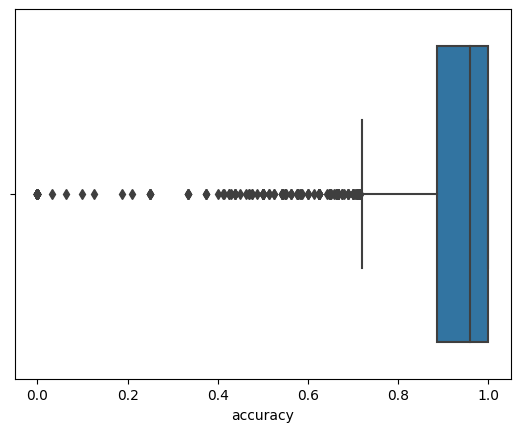

In [13]:
sns.boxplot(data=action_df.drop_duplicates(subset="patient_id"), x="accuracy")

<Axes: xlabel='birth_year', ylabel='Count'>

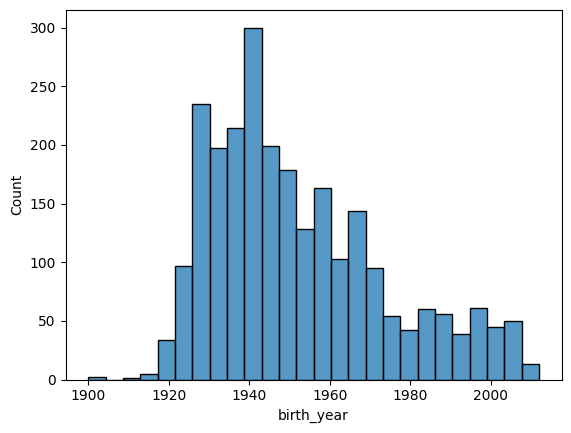

In [12]:
sns.histplot(data=action_df.drop_duplicates(subset="patient_id"), x="birth_year")

In [9]:
action_df["task_type_id"].value_counts()

20    50000
Name: task_type_id, dtype: int64

<Axes: >

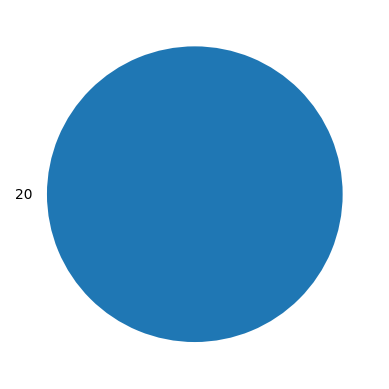

In [10]:
action_df.groupby("task_type_id").size().plot.pie()

### Others

In [ ]:
action_df = SQL("select * from constant_therapy.q3;", con)
action_df.head()

In [ ]:
action_df.nunique()

In [ ]:
sns.boxplot(data=action_df, x="accuracy")

In [ ]:
sns.histplot(data=action_df, x="task_level")

In [ ]:
action_df["task_type_id"].value_counts()

In [ ]:
action_df.groupby("task_type_id").size().plot.pie()

### Basic plots/Misc

In [7]:
query = """
select * from constant_therapy.q3;
"""
data = SQL(query, con)

In [8]:
data.nunique()

patient_id             32552
session_id           2538145
type                       1
parent_id             491158
schedule_id           299199
start_time              1375
start_time_min       2485544
end_time                1375
end_time_min         2398328
total_exercises           74
duration                6552
domain_id                 14
progression_order         37
task_type_id              93
task_level                12
accuracy                1088
latency                59053
dtype: int64

<Axes: >

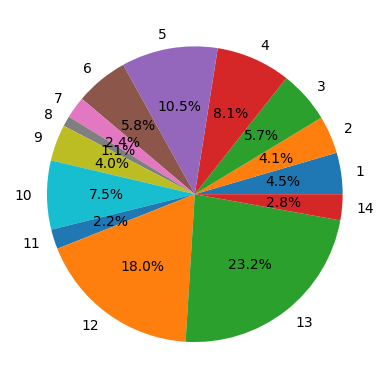

In [9]:
data.groupby("domain_id").size().plot.pie(autopct="%1.1f%%")

<Axes: >

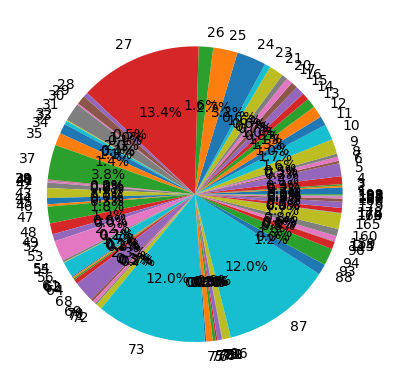

In [10]:
data.groupby("task_type_id").size().plot.pie(autopct="%1.1f%%")

In [ ]:
domain_groups = data.groupby("domain_id")
domain_groups["baseline_domain_score"].mean().sort_values()

In [ ]:
query = "select * from before_after_v2;"
data = SQL(query, con)

In [ ]:
data["acc_diff"] = data["after_accuracy_avg"] - data["before_accuracy_avg"]
data["acc_diff"].mean()

In [ ]:
data["lat_diff"] = data["after_log_latency_avg"] - data["before_log_latency_avg"]
data["lat_diff"].mean()

In [ ]:
print(data["completed_task_count"].mean())
sns.boxplot(data = data, x = "completed_task_count")

In [ ]:
disorder_data = data.groupby("disorder_id")
disorder_data.size().plot.pie(autopct='%1.1f%%')

In [ ]:
data.head()

In [ ]:
# borrowing Claire's table for now, takes around 3.5 mins
query = "select * from q3;"
data = SQL(query, con)

In [ ]:
data.head()

In [ ]:
## current accuracy

sns.boxplot(data=data, x="accuracy")

In [ ]:
## current task levels

tl_data = data.groupby("task_level")
tl_data.size().plot.pie()